In [2]:
import numpy as np
import pandas as pd
from glob import glob
from sklearn.metrics.pairwise import euclidean_distances

In [11]:
in_dir = "../Pipeline/onset-density/collapsed/combined/"
out_dir = "../Pipeline/onset-novelty/collapsed/combined/"
DENSITY_HOP_SIZE = 0.2 # sec, hop size of onset-density time series
NOVELTY_HOP_SIZE = 2 # compute novelty in 2 second incrememts

In [47]:
########################
# compute novelty
########################

def seconds_to_steps(sec):
    return int(sec/NOVELTY_HOP_SIZE)

def compute_novelty_by_lag(m,LAG):
    novelty = [None]*len(m)
    for i in range(LAG,len(m)-LAG):
        for j in range(-LAG,LAG):
            for k in range(-LAG,LAG):
                if (j*k >= 0): c = -1
                else: c = 1
                if (novelty[i] == None): novelty[i] = c*m[i+j,i+k]
                else: novelty[i] += c*m[i+j,i+k]
                
    return novelty

def get_novelty(in_file):
    # read in dataframe, create dissimilarity matrix
    onset_density = pd.read_csv(in_file)
    density = [[x] for x in onset_density.iloc[::10,:].density] # 2 sec bins
    m = euclidean_distances(density)
    
    # compute novelty
    novel5 = compute_novelty_by_lag(m, seconds_to_steps(5))
    novel10 = compute_novelty_by_lag(m, seconds_to_steps(10))
    novel20 = compute_novelty_by_lag(m, seconds_to_steps(20))
    novel60 = compute_novelty_by_lag(m, seconds_to_steps(60))
    
    # format data frame
    novel_df = pd.DataFrame({'t': [NOVELTY_HOP_SIZE*(i+1) for i in range(len(m))],
                             'novelty5': novel5,
                             'novelty10': novel10,
                             'novelty20': novel20})
    
    out_name = in_file.split('/')[-1].replace('-combined-onset-density','onset-novelty')
    novel_df.to_csv(out_dir+out_name+'-novelty.csv',index=False)
    return

In [49]:
########################
# compute novelty for every trial
########################

in_files = glob(in_dir+'*.csv')
for f in in_files:
    print(f)
    get_novelty(f)

../Pipeline/onset-density/collapsed/combined/a1b1-combined-onset-density.csv
get_novelty
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
../Pipeline/onset-density/collapsed/combined/a1d2-combined-onset-density.csv
get_novelty
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
../Pipeline/onset-density/collapsed/combined/a2b2-combined-onset-density.csv
get_novelty
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
../Pipeline/onset-density/collapsed/combined/a3b3-combined-onset-density.csv
get_novelty
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
../Pipeline/onset-density/collapsed/combined/a4b4-combined-onset-density.csv
get_novelty
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
../Pipeline/onset-density/collapsed/combined/aa1bb1-combined-onset-density.csv
get_novelty
comp

../Pipeline/onset-density/collapsed/combined/i1h1-combined-onset-density.csv
get_novelty
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
../Pipeline/onset-density/collapsed/combined/i2j2-combined-onset-density.csv
get_novelty
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
../Pipeline/onset-density/collapsed/combined/i2l2-combined-onset-density.csv
get_novelty
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
../Pipeline/onset-density/collapsed/combined/i3h3-combined-onset-density.csv
get_novelty
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
../Pipeline/onset-density/collapsed/combined/i4j4-combined-onset-density.csv
get_novelty
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
../Pipeline/onset-density/collapsed/combined/i4l4-combined-onset-density.csv
get_novelty
comput

../Pipeline/onset-density/collapsed/combined/q5p5-combined-onset-density.csv
get_novelty
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
../Pipeline/onset-density/collapsed/combined/q6r6-combined-onset-density.csv
get_novelty
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
../Pipeline/onset-density/collapsed/combined/q6t6-combined-onset-density.csv
get_novelty
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
../Pipeline/onset-density/collapsed/combined/q7r7-combined-onset-density.csv
get_novelty
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
../Pipeline/onset-density/collapsed/combined/s1t1-combined-onset-density.csv
get_novelty
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
compute_novelty_by_lag
../Pipeline/onset-density/collapsed/combined/s1v1-combined-onset-density.csv
get_novelty
comput

In [21]:
%ls ../Pipeline/onset-novelty/collapsed/combined

a1b1onset-novelty.csv-novelty.csv  a1d2onset-novelty.csv-novelty.csv


In [39]:
a1b1_novel = pd.read_csv(out_dir+'a1b1onset-novelty.csv-novelty.csv')

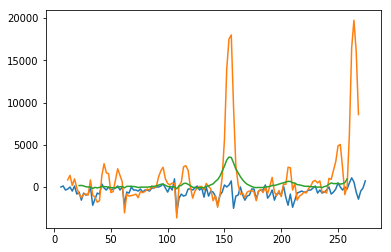

In [46]:
import matplotlib.pyplot as plt

plt.plot(a1b1_novel.t,60*a1b1_novel.novelty5)
plt.plot(a1b1_novel.t,30*a1b1_novel.novelty10)
plt.plot(a1b1_novel.t,a1b1_novel.novelty20)
plt.show()

In [42]:
a1b1.head()

,time,density,name,condition
0,2.0,0,a1b1,coupled
1,2.2,0,a1b1,coupled
2,2.4,0,a1b1,coupled
3,2.6,0,a1b1,coupled
4,2.8,0,a1b1,coupled
